In [114]:
import numpy as np 
import pandas as pd 
import gc
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter('error', SettingWithCopyWarning)

gc.enable()

In [2]:
path='/home/baitong/pywork/RevenuePrediction/'

In [289]:
def readAllData(csvpath=path,n=18,name = 'train0'):
    fulldata = pd.DataFrame()
    for i in range(n):       
        print('loading data : ' + name + '%d'%i)
        df = pd.read_csv(csvpath+name +str(i) +'.csv',dtype={'fullVisitorId': 'str'})
        fulldata = pd.concat([fulldata,df],axis=0)
        del df
        gc.collect()
    return fulldata

In [374]:
%%time
train = readAllData()
test = readAllData(n=5,name = 'test0')

loading data : train00


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (1,3,5,8,41,43,45,51,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train01


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (32,44,46,52,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/baitong/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


loading data : train02


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (41,43,45,51,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train03
loading data : train04
loading data : train05


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (27,28,30,43,45,51,53,64,71,76) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train06


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (26,27,28,30,43,45,51,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train07


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (41,43,45,51,53,63,64,65,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train08


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (43,45,51,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train09


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (1,3,5,8,43,45,51,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train010


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (41,43,45,51,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train011


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (1,3,8,17,41,43,45,51,53,67,74,79) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train012


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (1,3,8,17,43,45,51,53,65,66,67,74,79) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train013


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (1,3,8,41,43,45,51,53,65,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train014


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (43,45,51,53,66,73,78) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train015


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (41,43,45,51,66) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train016


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (1,3,5,8,41,43,45,51,66) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : train017


/home/baitong/tensorflow/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (26,27,28,30,33,41,44,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


loading data : test00
loading data : test01
loading data : test02
loading data : test03
loading data : test04
CPU times: user 58.7 s, sys: 7.84 s, total: 1min 6s
Wall time: 1min 26s


In [375]:
useless = ['customDimensions_index','hits_appInfo.screenDepth','hits_dataSource','hits_eCommerceAction.option',
'hits_eCommerceAction.step','hits_exceptionInfo.isFatal','hits_index','hits_isEntrance','hits_isExit','hits_isInteraction',
'hits_item.currencyCode','hits_minute','hits_page.searchCategory','hits_page.searchKeyword',
'hits_promotionActionInfo.promoIsClick','hits_social.socialInteractionNetworkAction','hits_time',
           'hits_transaction.affiliation','hits_transaction.localTransactionRevenue','hits_transaction.localTransactionShipping',
'hits_transaction.transactionTax','hits_transaction.transactionRevenue','hits_type','hits_value',
'hits_transaction.transactionShipping','hits_transaction.transactionTax','trafficSource_adwordsClickInfo.adNetworkType',
'trafficSource_adwordsClickInfo.isVideoAd','trafficSource_adwordsClickInfo.page',
'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign','trafficSource_keyword']

In [376]:
train.drop(useless,inplace = True ,axis =1)
test.drop(useless,inplace = True ,axis =1)

In [377]:
train.columns

Index(['channelGrouping', 'customDimensions_value', 'date', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'fullVisitorId', 'geoNetwork_city', 'geoNetwork_continent',
       'geoNetwork_country', 'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_region', 'geoNetwork_subContinent',
       'hits_appInfo.exitScreenName', 'hits_appInfo.landingScreenName',
       'hits_appInfo.screenName', 'hits_eCommerceAction.action_type',
       'hits_hitNumber', 'hits_hour', 'hits_item.transactionId',
       'hits_latencyTracking.domainLookupTime',
       'hits_latencyTracking.redirectionTime',
       'hits_latencyTracking.serverConnectionTime', 'hits_page.hostname',
       'hits_page.pagePath', 'hits_page.pagePathLevel1',
       'hits_page.pagePathLevel2', 'hits_page.pagePathLevel3',
       'hits_page.pagePathLevel4', 'hits_page.pageTitle',
       'hits_promotionActionInfo.promoIsView', 'hits_referer',
       'hits_social.hasSocial

In [378]:
num_feature = ['hits_hitNumber','hits_hour','totals_bounces','totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim','totals_timeOnSite',
       'totals_transactionRevenue', 'totals_transactions','visitNumber']
exclude_feature = ['visitStartTime','date','fullVisitorId']

In [433]:
%%time
train = pd.read_csv(path+'train_useful.csv',dtype={'fullVisitorId': 'str'})
test = pd.read_csv(path+'test_useful.csv',dtype={'fullVisitorId': 'str'})

CPU times: user 17.1 s, sys: 781 ms, total: 17.8 s
Wall time: 26.7 s


<string>:2: DtypeWarning: Columns (2,5,21,35,36,50) have mixed types. Specify dtype option on import or set low_memory=False.


In [434]:
train['referralPath_depth']=train['trafficSource_referralPath'][train['trafficSource_referralPath'].notnull()].apply(lambda x:x.count('/'))
train['exitScreenName_depth']=train['hits_appInfo.exitScreenName'][train['hits_appInfo.exitScreenName'].notnull()].apply(lambda x:x.count('/'))
train['landingScreenName_depth']=train['hits_appInfo.landingScreenName'][train['hits_appInfo.landingScreenName'].notnull()].apply(lambda x:x.count('/'))
train['pagePath_depth']=train['hits_page.pagePath'][train['hits_page.pagePath'].notnull()].apply(lambda x:x.count('/'))
train['pagePathLevel1_depth']=train['hits_page.pagePathLevel1'][train['hits_page.pagePathLevel1'].notnull()].apply(lambda x:x.count('/'))
train['pagePathLevel2_depth']=train['hits_page.pagePathLevel2'][train['hits_page.pagePathLevel2'].notnull()].apply(lambda x:x.count('/'))
train['pagePathLevel3_depth']=train['hits_page.pagePathLevel3'][train['hits_page.pagePathLevel3'].notnull()].apply(lambda x:x.count('/'))
train['pagePathLevel4_depth']=train['hits_page.pagePathLevel4'][train['hits_page.pagePathLevel4'].notnull()].apply(lambda x:x.count('/'))
train['hits_referer_depth']=train['hits_referer'][train['hits_referer'].notnull()].apply(lambda x:x.count('/'))



In [435]:
test['referralPath_depth']=test['trafficSource_referralPath'][test['trafficSource_referralPath'].notnull()].apply(lambda x:x.count('/'))
test['exitScreenName_depth']=test['hits_appInfo.exitScreenName'][test['hits_appInfo.exitScreenName'].notnull()].apply(lambda x:x.count('/'))
test['landingScreenName_depth']=test['hits_appInfo.landingScreenName'][test['hits_appInfo.landingScreenName'].notnull()].apply(lambda x:x.count('/'))
test['pagePath_depth']=test['hits_page.pagePath'][test['hits_page.pagePath'].notnull()].apply(lambda x:x.count('/'))
test['pagePathLevel1_depth']=test['hits_page.pagePathLevel1'][test['hits_page.pagePathLevel1'].notnull()].apply(lambda x:x.count('/'))
test['pagePathLevel2_depth']=test['hits_page.pagePathLevel2'][test['hits_page.pagePathLevel2'].notnull()].apply(lambda x:x.count('/'))
test['pagePathLevel3_depth']=test['hits_page.pagePathLevel3'][test['hits_page.pagePathLevel3'].notnull()].apply(lambda x:x.count('/'))
test['pagePathLevel4_depth']=test['hits_page.pagePathLevel4'][test['hits_page.pagePathLevel4'].notnull()].apply(lambda x:x.count('/'))
test['hits_referer_depth']=test['hits_referer'][test['hits_referer'].notnull()].apply(lambda x:x.count('/'))
len(test.columns)

62

In [436]:
depth_feature = ['referralPath_depth','exitScreenName_depth','landingScreenName_depth',
                'pagePath_depth','pagePathLevel1_depth','pagePathLevel2_depth',
                'pagePathLevel3_depth','pagePathLevel4_depth','hits_referer_depth']
cat_feature = [f for f in train.columns if (f not in exclude_feature+num_feature+depth_feature)]
print(cat_feature)

['channelGrouping', 'customDimensions_value', 'device_browser', 'device_deviceCategory', 'device_isMobile', 'device_operatingSystem', 'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region', 'geoNetwork_subContinent', 'hits_appInfo.exitScreenName', 'hits_appInfo.landingScreenName', 'hits_appInfo.screenName', 'hits_eCommerceAction.action_type', 'hits_page.hostname', 'hits_page.pagePath', 'hits_page.pagePathLevel1', 'hits_page.pagePathLevel2', 'hits_page.pagePathLevel3', 'hits_page.pagePathLevel4', 'hits_page.pageTitle', 'hits_promotionActionInfo.promoIsView', 'hits_referer', 'hits_social.hasSocialSourceReferral', 'hits_social.socialNetwork', 'hits_transaction.currencyCode', 'hits_transaction.localTransactionTax', 'trafficSource_adContent', 'trafficSource_isTrueDirect', 'trafficSource_medium', 'trafficSource_referralPath', 'trafficSource_source']


In [437]:
##将缺失值表示统一
def replaceCatNa(df):
    Nalist = ['(not set)','0','not available in demo dataset','unknown.unknown','(not provided)','(none)']
    for col in cat_feature:
        df[col] = df[col].astype('str') 
        df[col] = df[col].apply(lambda x : np.nan if x in Nalist else x)
    return df

In [438]:
train = replaceCatNa(train)
test = replaceCatNa(test)

In [439]:
###将时间戳转换为标准时间表示
train.visitStartTime = pd.to_datetime(train.visitStartTime, unit='s')
test.visitStartTime = pd.to_datetime(test.visitStartTime, unit='s')
train.head()

,channelGrouping,customDimensions_value,date,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,fullVisitorId,geoNetwork_city,geoNetwork_continent,...,visitStartTime,referralPath_depth,exitScreenName_depth,landingScreenName_depth,pagePath_depth,pagePathLevel1_depth,pagePathLevel2_depth,pagePathLevel3_depth,pagePathLevel4_depth,hits_referer_depth
0,Organic Search,EMEA,20171016.0,Firefox,desktop,False,Windows,3162355547410993243,NaN,Europe,...,2017-10-17 00:00:50,NaN,3.0,3.0,3.0,2.0,2.0,1.0,NaN,3.0
1,Referral,North America,20171016.0,Chrome,desktop,False,Chrome OS,8934116514970143966,Cupertino,Americas,...,2017-10-16 17:51:47,6.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,8.0
2,Direct,North America,20171016.0,Chrome,mobile,True,Android,7992466427990357681,NaN,Americas,...,2017-10-17 00:53:33,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0
3,Organic Search,EMEA,20171016.0,Chrome,desktop,False,Windows,9075655783635761930,NaN,Asia,...,2017-10-16 16:04:11,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0
4,Organic Search,Central America,20171016.0,Chrome,desktop,False,Windows,6960673291025684308,NaN,Americas,...,2017-10-16 21:49:12,NaN,4.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0


In [440]:
for df in [train, test]:
    df['weekday'] = df['visitStartTime'].dt.dayofweek.astype(object)
    df['month'] = df['visitStartTime'].dt.month   # it must not be included in features during learning!
#     df['day'] = df['visitStartTime'].dt.date       # it must not be included in features during learning!
    df['hours'] = df['visitStartTime'].dt.hour

In [441]:
###增加特征 ：是否为双休日
train['isWeekend'] = train['weekday'].apply(lambda x:1 if x>=5 else 0)
test['isWeekend'] = test['weekday'].apply(lambda x:1 if x>=5 else 0)

# train.to_csv(path+'train_useful.csv',index = False)
# test.to_csv(path+'test_useful.csv',index = False)

In [442]:
def addFeature(df):
    df['isWeekend'] = df['weekday'].apply(lambda x:1 if x>=5 else 0)
    predmis = df[df['totals_pageviews'].isnull()]['totals_hits'].values
    df.loc[(df['totals_pageviews'].isnull()),'totals_pageviews' ] = predmis
     ####增加特征：浏览器是否为Chrome
    df['isChrome'] = df['device_browser'].apply(lambda x:1 if x=='Chrome' else 0)   
    df['s_ismall'] = df['trafficSource_source'].apply(lambda x:1 if x=='mall.googleplex.com' else 0)
    df['s_isyoutube'] = df['trafficSource_source'].apply(lambda x:1 if x=='youtube.com' else 0)
    df['d_isdesktop'] = df['device_deviceCategory'].apply(lambda x:1 if x=='desktop' else 0)
    df['d_Macintosh'] = df['device_operatingSystem'].apply(lambda x:1 if x=='Macintosh' else 0)
    df['d_Macintosh'] = df['device_operatingSystem'].apply(lambda x:1 if x=='Macintosh' else 0)
    df['d_Linux'] = df['device_operatingSystem'].apply(lambda x:1 if x=='Linux' else 0)
    df['d_iOS'] = df['device_operatingSystem'].apply(lambda x:1 if x=='iOS' else 0)
    df['d_Android'] = df['device_operatingSystem'].apply(lambda x:1 if x=='Android' else 0)
    df['d_Windows Phone'] = df['device_operatingSystem'].apply(lambda x:1 if x=='Windows Phone' else 0)
    df['channel_referral'] = df['channelGrouping'].apply(lambda x:1 if x=='Referral' else 0)
    df['channel_Social'] = df['channelGrouping'].apply(lambda x:1 if x=='Social' else 0)
    def dealbrowser(s):
        if s == "Safari "or s == "Firefox":
            return "mainstream"
        elif s == "Chrome":
            return "Chrome"
        else:
            return "others"
    df['browser'] = df['device_browser'].apply(dealbrowser)
    df['m_referral'] = df['trafficSource_medium'].apply(lambda x:1 if x=='referral' else 0)  
    df['single_visit'] = df['visitNumber'].apply(lambda x:0 if x!=1 else 1)
    df['totals_hits'] = df['totals_hits'].astype('float') 
    df['totals_pageviews'] = df['totals_pageviews'].astype('float') 
    df['hits_ratio'] = df['totals_hits']/df['totals_pageviews']
    
    return df

In [443]:
train = addFeature(train)
test = addFeature(test)

In [444]:
train.columns

Index(['channelGrouping', 'customDimensions_value', 'date', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'fullVisitorId', 'geoNetwork_city', 'geoNetwork_continent',
       'geoNetwork_country', 'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_region', 'geoNetwork_subContinent',
       'hits_appInfo.exitScreenName', 'hits_appInfo.landingScreenName',
       'hits_appInfo.screenName', 'hits_eCommerceAction.action_type',
       'hits_hitNumber', 'hits_hour', 'hits_page.hostname',
       'hits_page.pagePath', 'hits_page.pagePathLevel1',
       'hits_page.pagePathLevel2', 'hits_page.pagePathLevel3',
       'hits_page.pagePathLevel4', 'hits_page.pageTitle',
       'hits_promotionActionInfo.promoIsView', 'hits_referer',
       'hits_social.hasSocialSourceReferral', 'hits_social.socialNetwork',
       'hits_transaction.currencyCode', 'hits_transaction.localTransactionTax',
       'totals_bounces', 'totals_hits', 'totals_

In [445]:
num_feature = ['hits_hitNumber','hits_hour','totals_bounces','totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim','totals_timeOnSite','hits_ratio','referralPath_depth', 'exitScreenName_depth', 'landingScreenName_depth',
       'pagePath_depth', 'pagePathLevel1_depth', 'pagePathLevel2_depth',
       'pagePathLevel3_depth', 'pagePathLevel4_depth', 'hits_referer_depth',
       'totals_transactionRevenue', 'totals_transactions','visitNumber']
exclude_feature = ['visitStartTime','date','fullVisitorId']
cat_feature = [f for f in train.columns if (f not in exclude_feature+num_feature)]
def dealMissingData(df):
    for c in df.columns:
        num_missing = df[c].isnull().sum() 
        if num_missing != 0:
            print("missing col is  ",c,'   missing num is',num_missing)
    print('*'*20)
    for col in num_feature:
        df[col].fillna(0,inplace=True)
    for col in cat_feature:
        df[col].fillna(0,inplace=True)
    for c in df.columns:
        num_missing = df[c].isnull().sum() 
        if num_missing != 0:
            print("now missing col is  ",c,'   missing num is',num_missing)
    print('---------------done---------------')
    return df

In [446]:
train = dealMissingData(train)
test = dealMissingData(test)

missing col is   device_browser    missing num is 19
missing col is   device_operatingSystem    missing num is 11815
missing col is   geoNetwork_city    missing num is 998826
missing col is   geoNetwork_continent    missing num is 2517
missing col is   geoNetwork_country    missing num is 2517
missing col is   geoNetwork_metro    missing num is 1319855
missing col is   geoNetwork_networkDomain    missing num is 768845
missing col is   geoNetwork_region    missing num is 982733
missing col is   geoNetwork_subContinent    missing num is 2517
missing col is   hits_hitNumber    missing num is 1215
missing col is   hits_hour    missing num is 1215
missing col is   hits_social.socialNetwork    missing num is 1352079
missing col is   totals_bounces    missing num is 836759
missing col is   totals_newVisits    missing num is 400907
missing col is   totals_sessionQualityDim    missing num is 835274
missing col is   totals_timeOnSite    missing num is 874294
missing col is   totals_transactionRe

In [448]:
def clearRare(columnname, limit = 2000):
    # you may search for rare categories in train, train&test, or just test
    #vc = pd.concat([train[columnname], test[columnname]], sort=False).value_counts()
    vc = test[columnname].value_counts()
    
    common = vc > limit
    common = set(common.index[common].values)
    print("Set", sum(vc <= limit), columnname, "categories to 'other';", end=" ")
    
    train.loc[train[columnname].map(lambda x: x not in common), columnname] = 'other'
    test.loc[test[columnname].map(lambda x: x not in common), columnname] = 'other'
    print("now there are", train[columnname].nunique(), "categories in train")

In [449]:
for col in cat_feature:
    clearRare(col)

Set 2 channelGrouping categories to 'other'; now there are 8 categories in train
Set 0 customDimensions_value categories to 'other'; now there are 6 categories in train
Set 55 device_browser categories to 'other'; now there are 9 categories in train
Set 1 device_deviceCategory categories to 'other'; now there are 3 categories in train
Set 1 device_isMobile categories to 'other'; now there are 2 categories in train
Set 16 device_operatingSystem categories to 'other'; now there are 8 categories in train
Set 482 geoNetwork_city categories to 'other'; now there are 22 categories in train
Set 2 geoNetwork_continent categories to 'other'; now there are 6 categories in train
Set 179 geoNetwork_country categories to 'other'; now there are 31 categories in train
Set 72 geoNetwork_metro categories to 'other'; now there are 11 categories in train
Set 15923 geoNetwork_networkDomain categories to 'other'; now there are 12 categories in train
Set 249 geoNetwork_region categories to 'other'; now ther

In [450]:
train.set_index("visitStartTime", inplace=True)
test.set_index("visitStartTime", inplace=True)
train.sort_index(inplace=True)
test.sort_index(inplace=True)

In [452]:
train['time'] = train.index
test['time'] = test.index


In [453]:
###增加上一次会话和下一次会话的时间间隔，时间间隔越短说明用户购买商品欲望更强烈
df = pd.concat([train, test])
df.sort_values(['fullVisitorId', 'time'], ascending=True, inplace=True)
df['prev_session'] = (df['time'] - df[['fullVisitorId', 'time']].groupby('fullVisitorId')['time'].shift(1)).astype(np.int64) // 1e9 // 60 // 60
df['next_session'] = (df['time'] - df[['fullVisitorId', 'time']].groupby('fullVisitorId')['time'].shift(-1)).astype(np.int64) // 1e9 // 60 // 60
df.sort_index(inplace=True)

train = df[:len(train)]
test = df[len(train):]

/home/baitong/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [454]:
for df in [train, test]:
    for col in cat_feature:
        df[col] = df[col].astype('str')

In [455]:
##组合特征
for df in [train, test]:
    df['source_country'] = df['trafficSource_source'] + '_' + df['geoNetwork_country']
    df['browser_category'] = df['device_browser'] + '_' + df['device_deviceCategory']
    df['browser_os'] = df['device_browser'] + '_' + df['device_operatingSystem']
##组合特征
for df in [train, test]:
    df['device_deviceCategory_channelGrouping'] = df['device_deviceCategory'] + "_" + df['channelGrouping']
    df['channelGrouping_browser'] = df['device_browser'] + "_" + df['channelGrouping']
    df['channelGrouping_OS'] = df['device_operatingSystem'] + "_" + df['channelGrouping']
    
    for i in ['geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country','geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region','geoNetwork_subContinent']:
        for j in ['device_browser','device_deviceCategory', 'device_operatingSystem', 'trafficSource_source']:
            df[i + "_" + j] = df[i] + "_" + df[j]
    
    df['content_source'] = df['trafficSource_adContent'].astype(str) + "_" + df['source_country']
    df['medium_source'] = df['trafficSource_medium'] + "_" + df['source_country']


In [456]:
len(train.columns)

119

In [457]:
##针对用户增加点击浏览量均值特征，以及访问人数最大值特征
for feature in ["totals_hits","totals_pageviews",'totals_sessionQualityDim','totals_timeOnSite','hits_ratio',
               'referralPath_depth','exitScreenName_depth', 'landingScreenName_depth',
                'pagePath_depth', 'pagePathLevel1_depth', 'pagePathLevel2_depth', 'prev_session','next_session'
                'pagePathLevel3_depth', 'pagePathLevel4_depth','hits_referer_depth', 
                'totals_transactionRevenue', 'totals_transactions']:
    info = pd.concat([train, test], sort=False).groupby("fullVisitorId")[feature].mean()
    train["usermean_" + feature] = train.fullVisitorId.map(info)
    test["usermean_" + feature] = test.fullVisitorId.map(info)

# 
#    
for feature in ["visitNumber",'hits_hitNumber']:
    info = pd.concat([train, test], sort=False).groupby("fullVisitorId")[feature].max()
    train["usermax_" + feature] = train.fullVisitorId.map(info)
    test["usermax_" + feature] = test.fullVisitorId.map(info)

In [458]:
excluded = ['date','month','day','time','visitId','hits_item.transactionId','hits_transaction.transactionId'
           ,"fullVisitorId",'visitNumber']
# unique_f = ['hours', 'isChrome', 'isWeekend', 'm_referral', 's_ismall', 's_isyoutube', 'single_visit', 'totals_bounces']
cat_cols = [f for f in train.columns if (train[f].dtype == 'object' and f not in excluded)]
real_cols = [f for f in train.columns if (not f in cat_cols and f not in excluded)]
print("cat_cols num: ",len(cat_cols))
print("cat_cols: ",cat_cols)
print("real_cols num: ",len(real_cols))
print("real_cols: ",real_cols)

cat_cols num:  89
cat_cols:  ['browser', 'channelGrouping', 'channel_Social', 'channel_referral', 'customDimensions_value', 'd_Android', 'd_Linux', 'd_Macintosh', 'd_Windows Phone', 'd_iOS', 'd_isdesktop', 'device_browser', 'device_deviceCategory', 'device_isMobile', 'device_operatingSystem', 'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region', 'geoNetwork_subContinent', 'hits_appInfo.exitScreenName', 'hits_appInfo.landingScreenName', 'hits_appInfo.screenName', 'hits_eCommerceAction.action_type', 'hits_page.hostname', 'hits_page.pagePath', 'hits_page.pagePathLevel1', 'hits_page.pagePathLevel2', 'hits_page.pagePathLevel3', 'hits_page.pagePathLevel4', 'hits_page.pageTitle', 'hits_promotionActionInfo.promoIsView', 'hits_referer', 'hits_social.hasSocialSourceReferral', 'hits_social.socialNetwork', 'hits_transaction.currencyCode', 'hits_transaction.localTransactionTax', 'hours', 'isChrome', 'isWeekend', 'm_refe

In [459]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

In [460]:
train.to_csv(path+'train_encoded.csv',index = False)
test.to_csv(path+'test_encoded.csv',index = False)

In [461]:
train.to_csv(path+'train_encoded2.csv',index = True)
test.to_csv(path+'test_encode2.csv',index = True)

In [463]:
train['fullVisitorId'].head()

visitStartTime
2016-08-01 07:00:12    0423043652415339154
2016-08-01 07:04:26    8294721032567046680
2016-08-01 07:04:41    7718623669497357235
2016-08-01 07:06:01    4798058133221713505
2016-08-01 07:06:10    5076747981380011349
Name: fullVisitorId, dtype: object

In [464]:
users_period = [
    (20160801, 20170115),
    (20170115, 20170630),
    (20170701, 20171215),
    (20171216, 20180601),
    # Using the same months!
    (20170501, 20171015),
]

predict_period = [
    (20170301, 20170430),
    (20170715, 20170915),
    (20180201, 20180331),
    (20180715, 20180915),
    # Using the same months!
    (20171201, 20180131),
]

In [465]:
train = train[train['date']!='No']
train['date'] = train['date'].astype("float")

In [466]:
revenues_list = []

for i in range(5):
    print("\nPeriod", i+1)
    a, b = users_period[i]
    batch = train[(train.date >= a) & (train.date <= b)]
    batch_visitors = batch.fullVisitorId.unique()
    print("There are", len(batch_visitors), "visitors in 5.5 months")
    
    c, d = predict_period[i]
    pred = train[(train.date >= c) & (train.date <= d)]
    pred_visitors = pred.fullVisitorId.unique()
    print("There are", len(pred_visitors), "visitors in 2 months")
    # Returning visitors
    same_visitors = np.intersect1d(batch_visitors, pred_visitors)
    print("{} visitors returned or {:.2f}%".format(len(same_visitors), 100*len(same_visitors)/len(batch_visitors)))
    # Returning visitors revenue
    with_rev = pred[(pred.fullVisitorId.isin(same_visitors)) & (pred.totals_transactionRevenue > 0)]
    print("And only {} returning visitors have revenue or {:.2f}% from total".format(len(with_rev), 100*len(with_rev)/len(batch_visitors)))
    print("The total revenue for this users is U$$ {:.2f}".format(with_rev.totals_transactionRevenue.sum()/1000000))
    revenues_list.append(with_rev.copy(deep=True))


Period 1
There are 377186 visitors in 5.5 months
There are 111299 visitors in 2 months
1871 visitors returned or 0.50%
And only 210 returning visitors have revenue or 0.06% from total
The total revenue for this users is U$$ 102504.27

Period 2
There are 286797 visitors in 5.5 months
There are 129144 visitors in 2 months
3285 visitors returned or 1.15%
And only 357 returning visitors have revenue or 0.12% from total
The total revenue for this users is U$$ 88637.14

Period 3
There are 384946 visitors in 5.5 months
There are 140808 visitors in 2 months
2943 visitors returned or 0.76%
And only 148 returning visitors have revenue or 0.04% from total
The total revenue for this users is U$$ 15886.58

Period 4
There are 297074 visitors in 5.5 months
There are 0 visitors in 2 months
0 visitors returned or 0.00%
And only 0 returning visitors have revenue or 0.00% from total
The total revenue for this users is U$$ 0.00

Period 5
There are 329636 visitors in 5.5 months
There are 144049 visitors i

In [467]:
def splitByDate(df,users_period,predict_period):
    print('split by date...')
    print('users_period is ',users_period[0],'======>',users_period[1])
    batch = train[(df.date >= users_period[0]) & (df.date <= users_period[1])]
    print('predict_period is ',predict_period[0],'======>',predict_period[1])
    pred = train[(df.date >= predict_period[0]) & (df.date <= predict_period[1])]
    print("-----------------done--------------------")
    return batch,pred

In [468]:
train['fullVisitorId'].astype("str")
batch1,pred1 = splitByDate(train,users_period[0],predict_period[0])
batch2,pred2 = splitByDate(train,users_period[1],predict_period[1])
batch3,pred3 = splitByDate(train,users_period[2],predict_period[2])
batch4,pred4 = splitByDate(train,users_period[4],predict_period[4])

split by date...
users_period is  20160801 ======> 20170115
predict_period is  20170301 ======> 20170430
-----------------done--------------------
split by date...
users_period is  20170115 ======> 20170630
predict_period is  20170715 ======> 20170915
-----------------done--------------------
split by date...
users_period is  20170701 ======> 20171215
predict_period is  20180201 ======> 20180331
-----------------done--------------------
split by date...
users_period is  20170501 ======> 20171015
predict_period is  20171201 ======> 20180131
-----------------done--------------------


In [469]:
def extractTarget(df,user_period,pred_period,name):
#     print(user_period)
    batch,pred = splitByDate(df,user_period,pred_period)
    batch,pred = batch.copy(),pred.copy()
    print("提取交集...")
    ####提取交集 ： 即查看预测日期区间与训练集日期区间的用户交集，这个交集是二次光顾商店的人群
    pred["isIdhavetest"] = pred['fullVisitorId'].isin(batch['fullVisitorId'])
#     print(pred["isIdhavetest"].value_counts())
    pred = pred[pred["isIdhavetest"]==True]
    batch["isIdhavetest"]= batch['fullVisitorId'].isin(pred['fullVisitorId'])
#     print(batch["isIdhavetest"].value_counts())
     ####处理标签
    print("处理标签...")
    pred["isIdhavetest"] = pred["isIdhavetest"].apply(lambda x: 1 if x==True else 0)
    batch["isIdhavetest"] = batch["isIdhavetest"].apply(lambda x: 1 if x==True else 0)
    pred['target'] =pred['totals_transactionRevenue']
    pred = pred[['target','fullVisitorId',"isIdhavetest",'totals_transactionRevenue']]
    batch['target'] = 0
    batch = batch[['target','fullVisitorId',"isIdhavetest"]]
    ####按用户ID排序
    print("按用户ID排序并赋值...")
    pred = pred.groupby('fullVisitorId').sum()
    batch = batch.groupby('fullVisitorId').sum()
    tmp1 =pd.DataFrame()
    tmp2 = pd.DataFrame()
    tmp1['target'] = batch['target'][batch["isIdhavetest"]>=1] 
    tmp2['target'] = batch['target'][batch["isIdhavetest"]==0] 
    tmp1['target'] = pred['totals_transactionRevenue']#获取回头客的消费记录
    tmp2['target'] = 0#非回头客默认置零
    tmp = pd.concat([tmp1, tmp2])
    tmp.sort_index(inplace=True)
    print("保存...文件名: "+name+'.csv')
    batch['target'] = tmp['target']
    batch[['target']].to_csv('/home/baitong/pywork/RevenuePrediction/'+name+'.csv', index=True)
#     print(batch['target'].value_counts())
    print('------------------结束--------------------')
    return batch['target']

In [477]:
target1['target'] = extractTarget(train,users_period[0],predict_period[0],'target1')
target2['target'] = extractTarget(train,users_period[1],predict_period[1],'target2')
target3['target'] = extractTarget(train,users_period[2],predict_period[2],'target3')
target4['target'] = extractTarget(train,users_period[4],predict_period[4],'target4')

split by date...
users_period is  20160801 ======> 20170115
predict_period is  20170301 ======> 20170430
-----------------done--------------------
提取交集...
处理标签...
按用户ID排序并赋值...
保存...文件名: target1.csv
------------------结束--------------------
split by date...
users_period is  20170115 ======> 20170630
predict_period is  20170715 ======> 20170915
-----------------done--------------------
提取交集...
处理标签...
按用户ID排序并赋值...
保存...文件名: target2.csv
------------------结束--------------------
split by date...
users_period is  20170701 ======> 20171215
predict_period is  20180201 ======> 20180331
-----------------done--------------------
提取交集...
处理标签...
按用户ID排序并赋值...
保存...文件名: target3.csv
------------------结束--------------------
split by date...
users_period is  20170501 ======> 20171015
predict_period is  20171201 ======> 20180131
-----------------done--------------------
提取交集...
处理标签...
按用户ID排序并赋值...
保存...文件名: target4.csv
------------------结束--------------------


In [478]:
len(target1),len(batch1)

(377187, 465858)

In [493]:
batch1 = batch1.copy()
batch2 = batch2.copy()
batch3 = batch3.copy()
batch4 = batch4.copy()

In [551]:
target1.head()

fullVisitorId
0000010278554503158    0
0000020424342248747    0
000005103959234087     0
0000093957001069502    0
0000114156543135683    0
Name: target, dtype: object

In [552]:
x['fullVisitorId']
x['fullVisitorId']=target1['fullVisitorId'].astype("float") - cat_agg1['fullVisitorId'].astype("float")
x['fullVisitorId'].value_counts()

KeyError: 'fullVisitorId'

In [494]:
# cat_cols 
# real_cols
cat_agg1 = batch1[cat_cols+['fullVisitorId']].groupby('fullVisitorId').mean()
cat_agg2 = batch2[cat_cols+['fullVisitorId']].groupby('fullVisitorId').mean()
cat_agg3 = batch3[cat_cols+['fullVisitorId']].groupby('fullVisitorId').mean()
cat_agg4 = batch4[cat_cols+['fullVisitorId']].groupby('fullVisitorId').mean()

real_agg1 = batch1[real_cols+['fullVisitorId']].groupby('fullVisitorId').sum()
real_agg2 = batch2[real_cols+['fullVisitorId']].groupby('fullVisitorId').sum()
real_agg3 = batch3[real_cols+['fullVisitorId']].groupby('fullVisitorId').sum()
real_agg4 = batch4[real_cols+['fullVisitorId']].groupby('fullVisitorId').sum()
len(cat_agg1),len(real_agg1)

(377186, 377186)

In [504]:
test_agg1 = test[cat_cols+['fullVisitorId']].groupby('fullVisitorId').mean()
test_agg2 = test[real_cols+['fullVisitorId']].groupby('fullVisitorId').sum()
test_fulldata = pd.concat([test_agg1,test_agg2],axis=1).astype("float")

In [550]:
# real_agg1.head()

In [534]:
test['fullVisitorId'][test['fullVisitorId'] == ':']

Series([], Name: fullVisitorId, dtype: object)

In [496]:
train_data1 = pd.concat([cat_agg1,real_agg1], axis=1).astype('float')
train_data2 = pd.concat([cat_agg2,real_agg2], axis=1).astype('float')
train_data3 = pd.concat([cat_agg3,real_agg3], axis=1).astype('float')
train_data4 = pd.concat([cat_agg4,real_agg4], axis=1).astype('float')


In [497]:
len(train_data1),len(train_data2),len(train_data3),len(train_data4)

(377186, 286797, 384946, 329636)

In [498]:
train_data1['target'] = target1['target']
train_data2['target'] = target2['target']
train_data3['target'] = target3['target']
train_data4['target'] = target4['target']

In [499]:
train_fulldata = pd.concat([train_data1,train_data2,train_data3,train_data4],axis = 0)

In [500]:
len(train_fulldata)

1378565

In [501]:
train_fulldata.head()

,browser,channelGrouping,channel_Social,channel_referral,customDimensions_value,d_Android,d_Linux,d_Macintosh,d_Windows Phone,d_iOS,...,usermean_pagePathLevel1_depth,usermean_pagePathLevel2_depth,usermean_pagePathLevel3_depth,usermean_pagePathLevel4_depth,usermean_hits_referer_depth,usermean_totals_transactionRevenue,usermean_totals_transactions,usermax_visitNumber,usermax_hits_hitNumber,target
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
0000010278554503158,0.0,3.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
0000020424342248747,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
000005103959234087,0.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
0000093957001069502,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
0000114156543135683,2.0,6.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0


In [502]:
# train_fulldata.to_csv(path+'train_fulldata.csv',index = False)
# train_fulldata.to_csv(path+'train_fulldata2.csv',index = True)

In [505]:

from sklearn.model_selection import GroupKFold
def get_folds(df=None, n_splits=5):
    """Returns dataframe indices corresponding to Visitors Group KFold"""
    # Get sorted unique visitors
    unique_vis = np.array(sorted(df['fullVisitorId'].unique()))

    # Get folds
    folds = GroupKFold(n_splits=n_splits)
    fold_ids = []
    ids = np.arange(df.shape[0])
    for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
        fold_ids.append(
            [
                ids[df['fullVisitorId'].isin(unique_vis[trn_vis])],
                ids[df['fullVisitorId'].isin(unique_vis[val_vis])]
            ]
        )

    return fold_ids

In [512]:
import lightgbm as lgb
folds = get_folds(df=train_fulldata[['totals_pageviews']].reset_index(), n_splits=5)
# cat_cols 
# real_cols
lgb_oof_preds = np.zeros(train_fulldata.shape[0])
lgb_sub_preds = np.zeros(test_fulldata.shape[0])
vis_importances = pd.DataFrame()
features = real_cols +cat_cols
for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = train_fulldata[features].iloc[trn_], train_fulldata['target'].iloc[trn_]
    val_x, val_y = train_fulldata[features].iloc[val_], train_fulldata['target'].iloc[val_]
    
    reg = lgb.LGBMRegressor(
        num_leaves=31,
        learning_rate=0.03,
        n_estimators=1500,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1
    )
    reg.fit(
        trn_x, np.log1p(trn_y),
        eval_set=[(trn_x, np.log1p(trn_y)), (val_x, np.log1p(val_y))],
        eval_names=['TRAIN', 'VALID'],
        early_stopping_rounds=50,
        eval_metric='rmse',
        verbose=100
    )
    
    imp_df = pd.DataFrame()
    imp_df['feature'] = trn_x.columns
    imp_df['gain'] = reg.booster_.feature_importance(importance_type='gain')
    
    imp_df['fold'] = fold_ + 1
    vis_importances = pd.concat([vis_importances, imp_df], axis=0, sort=False)
    
    lgb_oof_preds[val_] = reg.predict(val_x, num_iteration=reg.best_iteration_)
    lgb_oof_preds[lgb_oof_preds < 0] = 0
    
    # Make sure features are in the same order
    _preds = reg.predict(test_fulldata[features], num_iteration=reg.best_iteration_)
    _preds[_preds < 0] = 0
    lgb_sub_preds += _preds / len(folds)
    
mean_squared_error(np.log1p(train_fulldata['target']), lgb_oof_preds) ** .5

Training until validation scores don't improve for 50 rounds.
[100]	TRAIN's l2: 0.0497137	TRAIN's rmse: 0.222966	VALID's l2: 0.103872	VALID's rmse: 0.322292
[200]	TRAIN's l2: 0.0397314	TRAIN's rmse: 0.199327	VALID's l2: 0.102109	VALID's rmse: 0.319545
Early stopping, best iteration is:
[216]	TRAIN's l2: 0.0386263	TRAIN's rmse: 0.196536	VALID's l2: 0.101894	VALID's rmse: 0.319209
Training until validation scores don't improve for 50 rounds.
[100]	TRAIN's l2: 0.0504086	TRAIN's rmse: 0.224519	VALID's l2: 0.0999132	VALID's rmse: 0.31609
[200]	TRAIN's l2: 0.0403914	TRAIN's rmse: 0.200976	VALID's l2: 0.0981185	VALID's rmse: 0.313239
[300]	TRAIN's l2: 0.0351412	TRAIN's rmse: 0.18746	VALID's l2: 0.0972585	VALID's rmse: 0.311863
[400]	TRAIN's l2: 0.0318295	TRAIN's rmse: 0.178408	VALID's l2: 0.0968321	VALID's rmse: 0.311179
[500]	TRAIN's l2: 0.0274364	TRAIN's rmse: 0.165639	VALID's l2: 0.0966668	VALID's rmse: 0.310913
Early stopping, best iteration is:
[467]	TRAIN's l2: 0.0290151	TRAIN's rmse: 0

0.3052771041238342

In [513]:
empty_table = np.zeros(train_fulldata.shape[0])
mean_squared_error(np.log1p(train_fulldata['target']), empty_table) ** .5

0.4052064639980773

/home/baitong/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


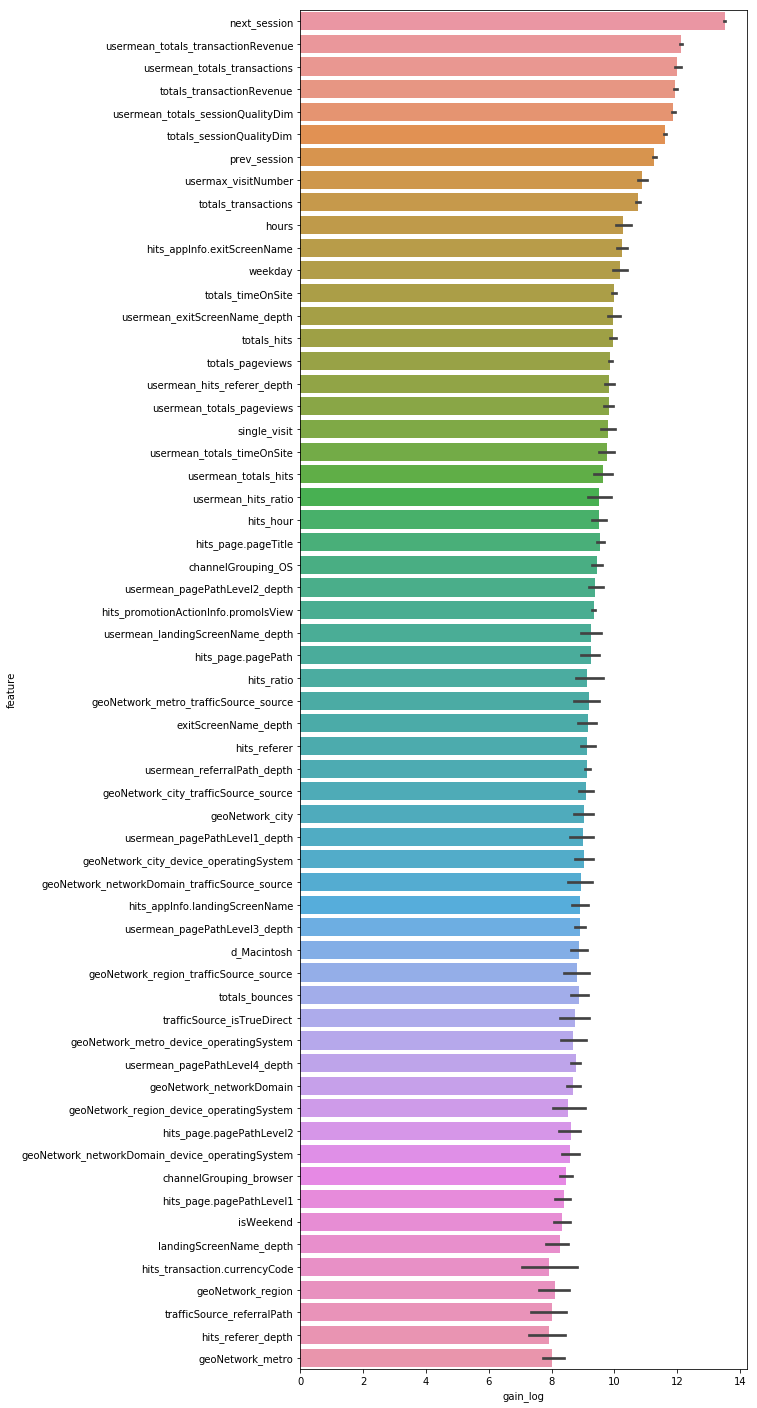

In [514]:
vis_importances['gain_log'] = np.log1p(vis_importances['gain'])
mean_gain = vis_importances[['gain', 'feature']].groupby('feature').mean()
vis_importances['mean_gain'] = vis_importances['feature'].map(mean_gain['gain'])

plt.figure(figsize=(8, 25))
sns.barplot(x='gain_log', y='feature', data=vis_importances.sort_values('mean_gain', ascending=False).iloc[:300])

In [520]:
xgb_params = {
        'objective': 'reg:linear',
        'booster': 'gbtree',
        'learning_rate': 0.06,
        'max_depth': 22,
        'min_child_weight': 57,
        'gamma' : 1.45,
        'alpha': 0.0,
        'lambda': 0.0,
        'subsample': 0.67,
        'colsample_bytree': 0.054,
        'colsample_bylevel': 0.50,
        'n_jobs': -1,
        'random_state': 456
    }

In [521]:
from xgboost import XGBRegressor

fit_params={"early_stopping_rounds": 50, "verbose": 100, "eval_metric": "rmse"}

folds = get_folds(df=train_fulldata[['totals_pageviews']].reset_index(), n_splits=5)

xgb_oof_preds = np.zeros(train_fulldata.shape[0])
xgb_sub_preds = np.zeros(test_fulldata.shape[0])
vis_importances = pd.DataFrame()

for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = train_fulldata[features].iloc[trn_], train_fulldata['target'].iloc[trn_]
    val_x, val_y = train_fulldata[features].iloc[val_], train_fulldata['target'].iloc[val_]
    
    xgb = XGBRegressor(**xgb_params, n_estimators=1000)
    
    xgb.fit(trn_x, np.log1p(trn_y),
            eval_set=[(val_x, np.log1p(val_y))],
            early_stopping_rounds=50,
            eval_metric='rmse',
            verbose = 100)
    xgb_oof_preds[val_] = xgb.predict(val_x)
    xgb_oof_preds[xgb_oof_preds < 0] = 0
    
    # Make sure features are in the same order
    _preds = xgb.predict(test_fulldata[features])
    _preds[_preds < 0] = 0
    xgb_sub_preds += _preds / len(folds)
    
mean_squared_error(np.log1p(train_fulldata['target']), xgb_oof_preds) ** .5

[0]	validation_0-rmse:0.62735
Will train until validation_0-rmse hasn't improved in 50 rounds.
[100]	validation_0-rmse:0.400565
[200]	validation_0-rmse:0.391848
[300]	validation_0-rmse:0.388109
[400]	validation_0-rmse:0.381957
[500]	validation_0-rmse:0.380828
[600]	validation_0-rmse:0.379539
Stopping. Best iteration:
[591]	validation_0-rmse:0.37951

[0]	validation_0-rmse:0.630876
Will train until validation_0-rmse hasn't improved in 50 rounds.
[100]	validation_0-rmse:0.407148
[200]	validation_0-rmse:0.391814
[300]	validation_0-rmse:0.383253
[400]	validation_0-rmse:0.375858
[500]	validation_0-rmse:0.373025
[600]	validation_0-rmse:0.371473
[700]	validation_0-rmse:0.370325
[800]	validation_0-rmse:0.369945
Stopping. Best iteration:
[805]	validation_0-rmse:0.369772

[0]	validation_0-rmse:0.605774
Will train until validation_0-rmse hasn't improved in 50 rounds.
[100]	validation_0-rmse:0.365288
[200]	validation_0-rmse:0.359587
[300]	validation_0-rmse:0.352515
[400]	validation_0-rmse:0.346004


0.35171739140362834

In [ ]:
cat_param = {
    'learning_rate' :0.03,
    'depth' :10,
    'eval_metric' :'RMSE',
    'od_type' :'Iter',
    'metric_period ' : 50,
    'od_wait' : 20,
    'seed' : 42
    
}

In [524]:
from catboost import CatBoostRegressor
folds = get_folds(df=train_fulldata[['totals_pageviews']].reset_index(), n_splits=5)

cat_oof_preds = np.zeros(train_fulldata[features].shape[0])
cat_sub_preds = np.zeros(test_fulldata[features].shape[0])
vis_importances = pd.DataFrame()

for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = train_fulldata[features].iloc[trn_], train_fulldata['target'].iloc[trn_]
    val_x, val_y = train_fulldata[features].iloc[val_], train_fulldata['target'].iloc[val_]
    
    cat = CatBoostRegressor(iterations=1000,learning_rate=0.03,
                            depth=10,
                            eval_metric='RMSE',
                            random_seed = 42,
                            bagging_temperature = 0.2,
                            od_type='Iter',
                            metric_period = 50,
                            od_wait=20)
    cat.fit(trn_x, np.log1p(trn_y), 
            eval_set=[(val_x, np.log1p(val_y))],
            early_stopping_rounds=50,
            use_best_model=True,
            verbose=100)
    cat_oof_preds[val_] = cat.predict(val_x)
    cat_oof_preds[cat_oof_preds < 0] = 0
    
    # Make sure features are in the same order
    _preds = cat.predict(test_fulldata[features])
    _preds[_preds < 0] = 0
    cat_sub_preds += _preds / len(folds)
    
mean_squared_error(np.log1p(train_fulldata['target']), cat_oof_preds) ** .5

0:	learn: 0.3948349	test: 0.4216606	best: 0.4216606 (0)	total: 660ms	remaining: 10m 59s
100:	learn: 0.2530891	test: 0.3310918	best: 0.3310918 (100)	total: 1m 2s	remaining: 9m 15s
200:	learn: 0.2264736	test: 0.3272440	best: 0.3272440 (200)	total: 2m 3s	remaining: 8m 11s
300:	learn: 0.2093437	test: 0.3260670	best: 0.3260670 (300)	total: 3m 4s	remaining: 7m 7s
400:	learn: 0.1961983	test: 0.3253234	best: 0.3253033 (371)	total: 4m 4s	remaining: 6m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.324576125
bestIteration = 432

Shrink model to first 433 iterations.


0:	learn: 0.3936926	test: 0.4267970	best: 0.4267970 (0)	total: 623ms	remaining: 10m 22s
100:	learn: 0.2548923	test: 0.3219058	best: 0.3219058 (100)	total: 1m 2s	remaining: 9m 11s
200:	learn: 0.2288157	test: 0.3181117	best: 0.3180375 (196)	total: 2m 2s	remaining: 8m 8s
300:	learn: 0.2110260	test: 0.3155720	best: 0.3155545 (298)	total: 3m 5s	remaining: 7m 11s
400:	learn: 0.1945984	test: 0.3150109	best: 0.3149885 (397)	total: 4m 10s	remaining: 6m 13s
500:	learn: 0.1801390	test: 0.3137685	best: 0.3137685 (500)	total: 5m 13s	remaining: 5m 12s
600:	learn: 0.1644342	test: 0.3131954	best: 0.3131124 (570)	total: 6m 14s	remaining: 4m 8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3128326647
bestIteration = 619

Shrink model to first 620 iterations.


0:	learn: 0.4034558	test: 0.3878062	best: 0.3878062 (0)	total: 638ms	remaining: 10m 36s
100:	learn: 0.2600303	test: 0.3080388	best: 0.3079991 (99)	total: 1m 2s	remaining: 9m 19s
200:	learn: 0.2329612	test: 0.3055564	best: 0.3055564 (200)	total: 2m 3s	remaining: 8m 12s
300:	learn: 0.2148329	test: 0.3035187	best: 0.3034069 (295)	total: 3m 3s	remaining: 7m 6s
400:	learn: 0.1983685	test: 0.3020463	best: 0.3020002 (397)	total: 4m 3s	remaining: 6m 3s
500:	learn: 0.1847462	test: 0.3014184	best: 0.3013780 (498)	total: 5m 7s	remaining: 5m 5s
600:	learn: 0.1739787	test: 0.3008030	best: 0.3008030 (600)	total: 6m 6s	remaining: 4m 3s
700:	learn: 0.1637610	test: 0.3006248	best: 0.3004016 (650)	total: 7m 7s	remaining: 3m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.300401576
bestIteration = 650

Shrink model to first 651 iterations.


0:	learn: 0.4076506	test: 0.3695459	best: 0.3695459 (0)	total: 623ms	remaining: 10m 22s
100:	learn: 0.2649548	test: 0.2906144	best: 0.2906144 (100)	total: 1m 3s	remaining: 9m 27s
200:	learn: 0.2382905	test: 0.2881663	best: 0.2881503 (199)	total: 2m 4s	remaining: 8m 16s
300:	learn: 0.2234750	test: 0.2873576	best: 0.2872670 (297)	total: 3m 5s	remaining: 7m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2872669935
bestIteration = 297

Shrink model to first 298 iterations.


0:	learn: 0.4015174	test: 0.3958154	best: 0.3958154 (0)	total: 646ms	remaining: 10m 45s
100:	learn: 0.2631993	test: 0.3099869	best: 0.3099869 (100)	total: 1m 3s	remaining: 9m 26s
200:	learn: 0.2326576	test: 0.3062606	best: 0.3062127 (198)	total: 2m 4s	remaining: 8m 15s
300:	learn: 0.2172778	test: 0.3051595	best: 0.3051595 (300)	total: 3m 4s	remaining: 7m 9s
400:	learn: 0.2027169	test: 0.3039838	best: 0.3039838 (400)	total: 4m 5s	remaining: 6m 6s
500:	learn: 0.1895898	test: 0.3030817	best: 0.3030817 (500)	total: 5m 5s	remaining: 5m 4s
600:	learn: 0.1768307	test: 0.3023279	best: 0.3023233 (599)	total: 6m 8s	remaining: 4m 4s
700:	learn: 0.1649419	test: 0.3014279	best: 0.3014167 (695)	total: 7m 11s	remaining: 3m 4s
800:	learn: 0.1536633	test: 0.3002315	best: 0.3002315 (800)	total: 8m 15s	remaining: 2m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.300027553
bestIteration = 838

Shrink model to first 839 iterations.


0.3051962119359822

In [527]:
del train
gc.collect()
test_fulldata['lgb_pred'] = lgb_sub_preds
test_fulldata['xgb_pred'] = xgb_sub_preds
test_fulldata['cst_pred'] = cat_sub_preds
test_final_data = test_fulldata[['lgb_pred','xgb_pred','cst_pred']]
train_fulldata['lgb_pred'] = lgb_oof_preds
train_fulldata['xgb_pred'] = xgb_oof_preds
train_fulldata['cst_pred'] = cat_oof_preds
train_final_data = train_fulldata[['lgb_pred','xgb_pred','cst_pred']]


In [528]:
from sklearn.linear_model import LinearRegression

folds = get_folds(df=train_fulldata[['totals_pageviews']].reset_index(), n_splits=5)

final_oof_preds = np.zeros(train_final_data.shape[0])
final_sub_preds = np.zeros(test_final_data.shape[0])
vis_importances = pd.DataFrame()

for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = train_final_data.iloc[trn_], train_fulldata['target'].iloc[trn_]
    val_x, val_y = train_final_data.iloc[val_], train_fulldata['target'].iloc[val_]
    
    lin_reg = LinearRegression()
    lin_reg.fit(trn_x,np.log1p(trn_y))
    final_oof_preds[val_] = lin_reg.predict(val_x)
    final_oof_preds[final_oof_preds < 0] = 0
    
    # Make sure features are in the same order
    _preds = lin_reg.predict(test_final_data[train_final_data.columns])
    _preds[_preds < 0] = 0
    final_sub_preds += _preds / len(folds)
    
mean_squared_error(np.log1p(train_fulldata['target']), final_oof_preds) ** .5

0.3032968698607239

In [529]:
test_fulldata['PredictedLogRevenue'] = final_sub_preds



In [544]:
# test_fulldata = test_fulldata[test_fulldata.index!=' : ']
test_fulldata[['PredictedLogRevenue']].to_csv('/home/baitong/pywork/RevenuePrediction/submission.csv', index=True)

In [545]:
test_fulldata.head()

,browser,channelGrouping,channel_Social,channel_referral,customDimensions_value,d_Android,d_Linux,d_Macintosh,d_Windows Phone,d_iOS,...,usermean_pagePathLevel4_depth,usermean_hits_referer_depth,usermean_totals_transactionRevenue,usermean_totals_transactions,usermax_visitNumber,usermax_hits_hitNumber,lgb_pred,xgb_pred,cst_pred,PredictedLogRevenue
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
0000018966949534117,0.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,1.0,1.0,0.000052,0.037590,0.024646,0.012427
0000039738481224681,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.000052,0.025915,0.000073,0.000000
0000073585230191399,2.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,1.0,1.0,0.000052,0.018681,0.024385,0.013218
0000087588448856385,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,1.0,0.000052,0.000049,0.009958,0.005670
0000149787903119437,0.0,3.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,1.0,0.000052,0.005720,0.009887,0.005344
